In [1]:
import pandas as pd
import numpy as np
from io import StringIO
Train = pd.read_csv("Data/train.csv")
Test = pd.read_csv("Data/test.csv")

In [2]:
Train.drop('apache_2_bodysystem', axis=1, inplace=True)
Test.drop('apache_2_bodysystem', axis=1, inplace=True)

In [3]:
# fill null values with median for temp_apache
Train['temp_apache'].fillna(Train['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
Train['d1_potassium_max'].fillna(Train['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
Train['apache_4a_hospital_death_prob'].fillna(Train['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
Train['apache_4a_icu_death_prob'].fillna(Train['apache_4a_icu_death_prob'].median(), inplace=True)
#since all these r heavily skewed andaffected by the outliers we will fill them using median imputation

Test['temp_apache'].fillna(Test['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
Test['d1_potassium_max'].fillna(Test['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
Test['apache_4a_hospital_death_prob'].fillna(Test['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
Test['apache_4a_icu_death_prob'].fillna(Test['apache_4a_icu_death_prob'].median(), inplace=True)
# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = Train.groupby('apache_3j_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_3j_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_3j_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
Train['age'] = Train.apply(fill_age, axis=1)

# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = Test.groupby('apache_3j_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_3j_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_3j_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
Test['age'] = Test.apply(fill_age, axis=1)

#for all binary columns we will apply mode imputation for missing values
#first we will create a list of all binary columns
binary_colsTest = ['elective_surgery', 'apache_post_operative', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache','immunosuppression', 'solid_tumor_with_metastasis']

binary_colsTrain = ['elective_surgery', 'apache_post_operative', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache','immunosuppression', 'solid_tumor_with_metastasis','hospital_death']
#now we will apply mode imputation on these columns
from sklearn.impute import SimpleImputer
binary_colsTest = [col for col in Train.columns if Train[col].dtype == 'object' or col in binary_colsTest]
binary_colsTrain = [col for col in Test.columns if Test[col].dtype == 'object' or col in binary_colsTrain]

imputer = SimpleImputer(strategy='most_frequent')
Train[binary_colsTrain] = imputer.fit_transform(Train[binary_colsTrain])
Test[binary_colsTest] = imputer.fit_transform(Test[binary_colsTest])

numeric_cols = [col for col in Train.select_dtypes(include=[np.number]).columns if col not in binary_colsTrain]
numeric_colsTest = [col for col in Test.select_dtypes(include=[np.number]).columns if col not in binary_colsTrain]

from sklearn.impute import KNNImputer

# create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# fill missing values in Train dataframe
Train[numeric_cols] = imputer.fit_transform(Train[numeric_cols])

# fill missing values in Test dataframe
Test[numeric_colsTest] = imputer.fit_transform(Test[numeric_colsTest])

In [67]:
Test.isnull().sum()

RecordID                         0
hospital_id                      0
icu_id                           0
ethnicity                        0
gender                           0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
apache_3j_bodysystem             0
age                              0
elective_surgery                 0
pre_icu_los_days                 0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_min                    0
d1_diasbp_noninvasive_min        0
d1_heartrate_max                 0
d1_mbp_min                       0
d1_mbp_noninvasive_m

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split, validation_curve
from sklearn.pipeline import make_pipeline

In [6]:
onehot= pd.get_dummies(Train)
onehotTest= pd.get_dummies(Test)

C:\Users\hamza\AppData\Local\Temp\ipykernel_21348\2793514417.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot= pd.get_dummies(Train)
C:\Users\hamza\AppData\Local\Temp\ipykernel_21348\2793514417.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot= pd.get_dummies(Train)
C:\Users\hamza\AppData\Local\Temp\ipykernel_21348\2793514417.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot= pd.get_dummies(Train)
C:\Users\hamza\AppData\Local\Temp\ipykernel_21348\2793514417.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot= pd.get_dummies(Train)
C:\U

In [7]:
X=onehot.loc[:, onehot.columns != 'hospital_death']
y=onehot['hospital_death']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [9]:
from sklearn.tree import DecisionTreeClassifier

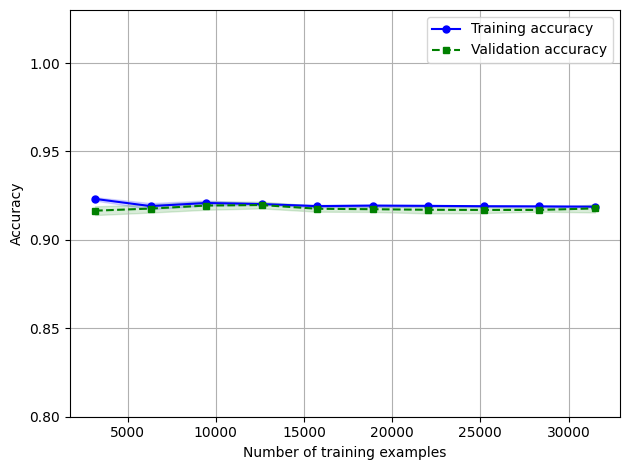

In [10]:
#pipe_lr = make_pipeline(StandardScaler(),
#                        LogisticRegression(penalty='l2', max_iter=10000))

pipe_lr = make_pipeline(DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0))
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

In [12]:
pipe_lr.fit(X_train, y_train)   

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=0))])

In [14]:
#calcuate roc auc score for train data
from sklearn.metrics import roc_auc_score
y_test_pred = pipe_lr.predict_proba(X_test)[:, 1]
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_test_pred))

ROC AUC: 0.836


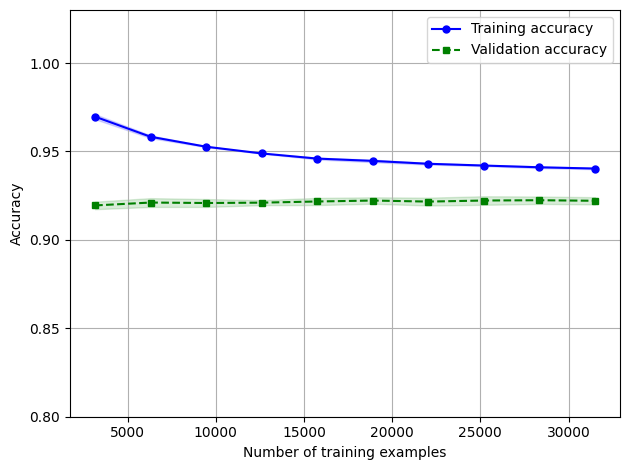

In [69]:
#pipe_lr = make_pipeline(StandardScaler(),
#                        LogisticRegression(penalty='l2', max_iter=10000))

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

pipe_randomforest= make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=550,criterion='entropy', max_depth=10, random_state=0))
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_randomforest,
                               X=X_train,
                               y=y_train,
                        
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

In [70]:
pipe_randomforest.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_estimators=550, random_state=0))])

In [71]:
#calcuate roc auc score for train data
y_test_pred = pipe_randomforest.predict_proba(X_test)[:, 1]
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_test_pred))

ROC AUC: 0.879


In [111]:
cb = CatBoostClassifier(iterations=350, depth=5, learning_rate=0.1, loss_function='Logloss', verbose=False)
#record the start time
start_time = time.time()
cb.fit(X_train,y_train)
md_probs = cb.predict_proba(X_test)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test, md_probs)
print("Cat Boost", " : ", md_auc)
#record the end time
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time CB: ", total_time)

Cat Boost  :  0.886019542804019
Total time CB:  10.864663124084473


In [112]:
y_new_pred = cb.predict_proba(onehotTest)
hospital_death = y_new_pred[:, 1]



In [97]:
y_new_pred = pipe_randomforest.predict_proba(onehotTest)
hospital_death = y_new_pred[:, 1]



In [ ]:
#create a random tree classifier to predict the hospital_death

In [113]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictionsCAT.csv', index=False)

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [33]:

import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
%pip install catboost
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

^C
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'catboost'

In [38]:
def fit_model(model, model_name):
    model.fit(X_train,y_train)
    md_probs = model.predict_proba(X_test)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(y_test, md_probs)
    print(model_name, " : ", md_auc)

In [64]:
num_of_models = 500
depth_level = 3

In [65]:
#record the start time
start_time = time.time()
rf = RandomForestClassifier(max_depth=10,n_estimators=num_of_models, n_jobs=-1)
fit_model(rf, "Random Forest")
#record the end time
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time RF: ", total_time)

#record the start time
# start_time = time.time()
# gb = GradientBoostingClassifier(max_depth=depth_level,n_estimators=num_of_models)
# fit_model(gb, "Graident Boosting")
# #record the end time
# end_time = time.time()
# #calculate the total time
# total_time = end_time - start_time
# print("Total time GB: ", total_time)


Random Forest  :  0.8758334381754814
Total time RF:  23.8332781791687


In [66]:
y_new_pred = rf.predict_proba(onehotTest)
hospital_death = y_new_pred[:, 1]

